In [242]:
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

dataset = pd.read_csv('income.csv')
print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

<Axes: title={'center': 'Objects in workclass'}, xlabel='objects', ylabel='count'>

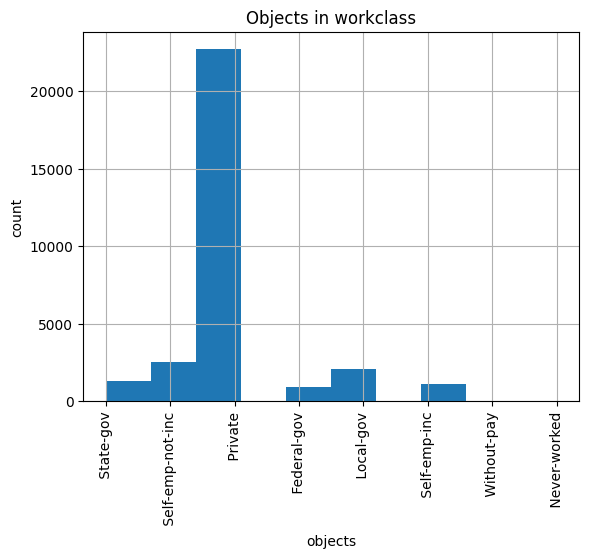

In [243]:
dataset.replace(' ?', np.NaN, inplace=True)
plt.xticks(rotation=90)
plt.title('Objects in workclass')
plt.ylabel('count')
plt.xlabel('objects')
dataset['workclass'].hist()

In [262]:
from sklearn.preprocessing import LabelEncoder
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
dataset_numerical = dataset
le = LabelEncoder()
for column in categorical:
    dataset_numerical[column] = le.fit_transform(dataset_numerical[column])


y = dataset['income']
X = dataset.drop(columns=(['income']), axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)

X_train = X_train.to_numpy(dtype='float32')
X_test = X_test.to_numpy(dtype='float32')


/var/folders/wf/76d44z0909j2ycq9x7pgvvyh0000gn/T/ipykernel_3067/298414724.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
/var/folders/wf/76d44z0909j2ycq9x7pgvvyh0000gn/T/ipykernel_3067/298414724.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [263]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.src.utils import to_categorical

print(X_train.shape)
print(X_test.shape)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
# 
print(y_train.shape)
print(y_test.shape)


(16280, 14)
(16281, 14)
(16280, 2)
(16281, 2)


In [264]:
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Input(shape=INPUT_SHAPE))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_91 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_92 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_93 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,162 (4.54 KB)

 Trainable params: 1,162 (4.54 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Precision', 'Recall'])

EPOCHS = 30

history = model.fit(X_train, y_train,batch_size = 32, epochs = EPOCHS,verbose = 1, validation_data = (X_test, y_test))

Epoch 1/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - Precision: 0.6395 - Recall: 0.6395 - loss: 505.3807 - val_Precision: 0.7879 - val_Recall: 0.7879 - val_loss: 3.1256
Epoch 2/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - Precision: 0.6663 - Recall: 0.6663 - loss: 24.1812 - val_Precision: 0.7873 - val_Recall: 0.7873 - val_loss: 1.4787
Epoch 3/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - Precision: 0.6829 - Recall: 0.6829 - loss: 8.6468 - val_Precision: 0.7894 - val_Recall: 0.7894 - val_loss: 7.7701
Epoch 4/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - Precision: 0.6900 - Recall: 0.6900 - loss: 6.2927 - val_Precision: 0.7987 - val_Recall: 0.7987 - val_loss: 2.4507
Epoch 5/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - Precision: 0.6900 - Recall: 0.6900 - loss: 6.4925 - val_Precision: 0.7971 - val_Recall: 0.7971 - val_loss: 3.2459
Epoch 6/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - Precision: 0.6912 - Recall: 0.6912 - loss: 3.5277 - val_Precision: 0.7871 - val_Recall: 0.7

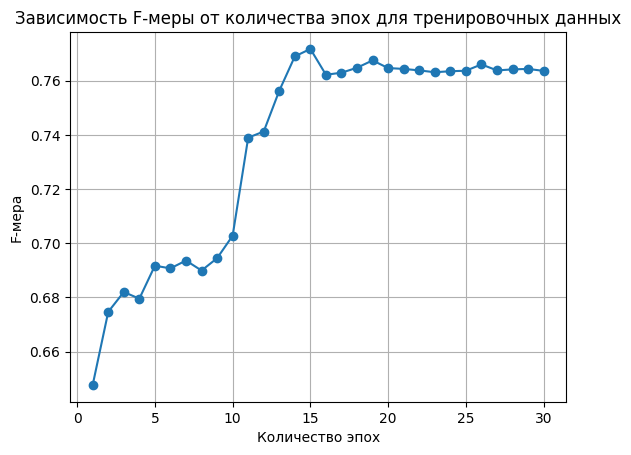

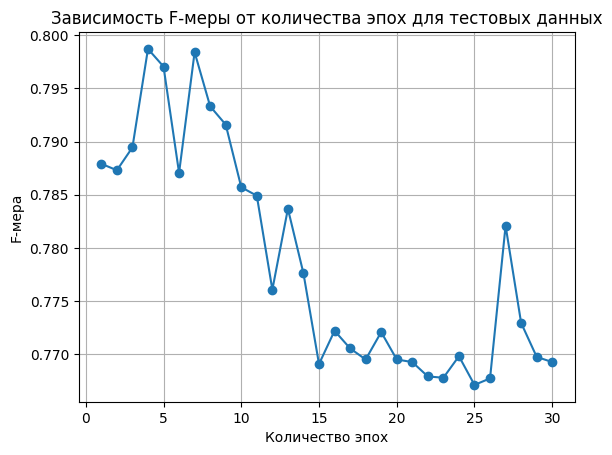

In [267]:
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    f1_score_list_train.append(2 * history.history['Precision'][i] * history.history['Recall'][i] / (history.history['Precision'][i] + history.history['Recall'][i]))
    f1_score_list_test.append(2 * history.history['val_Precision'][i] * history.history['val_Recall'][i] / (history.history['val_Precision'][i] + history.history['val_Recall'][i]))


plt.plot(range(1, EPOCHS+1), f1_score_list_train, marker='o')
plt.xlabel('Количество эпох')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества эпох для тренировочных данных')
plt.grid(True)
plt.show()

plt.plot(range(1, EPOCHS+1), f1_score_list_test, marker='o')
plt.xlabel('Количество эпох')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества эпох для тестовых данных')
plt.grid(True)
plt.show()


In [268]:
def map(data):
  output = []
  for i in range(len(data)):
    if data[i][0] > data[i][1]:
      output.append(0)
    else:
      output.append(1)
  return output

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(
    map(y_test),
    map(y_pred)
)
pd.DataFrame(
    data = conf_matrix,
    columns = [
        'predicted <=50k',
        'predicted >50k'
    ],
    index = [
        'actual <=50k',
        'actual >50k'
        ]
)

509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step


,predicted <=50k,predicted >50k
actual <=50k,12382,2
actual >50k,3755,142


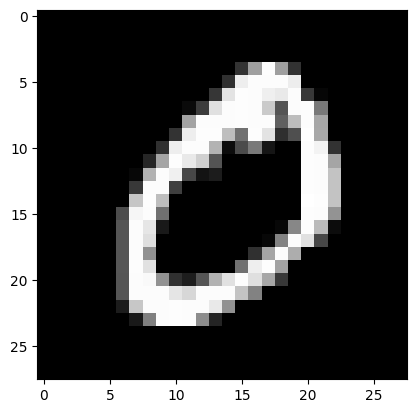

In [156]:
from keras.src.datasets import mnist

with np.load('mnist.npz', allow_pickle=True) as f:
    X_train, y_train = f['x_train'], f['y_train']
    X_test, y_test = f['x_test'], f['y_test']
sample = 1
image = X_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

Learning rate set to 0.5
0:	learn: 1.3551170	total: 286ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.3551170	total: 399ms	remaining: 399ms
1:	learn: 0.9974693	total: 746ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.3551170	total: 271ms	remaining: 542ms
1:	learn: 0.9974693	total: 546ms	remaining: 273ms
2:	learn: 0.8003425	total: 822ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.3551170	total: 277ms	remaining: 831ms
1:	learn: 0.9974693	total: 587ms	remaining: 587ms
2:	learn: 0.8003425	total: 866ms	remaining: 289ms
3:	learn: 0.6849849	total: 1.16s	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.3551170	total: 272ms	remaining: 1.09s
1:	learn: 0.9974693	total: 541ms	remaining: 811ms
2:	learn: 0.8003425	total: 816ms	remaining: 544ms
3:	learn: 0.6849849	total: 1.11s	remaining: 277ms
4:	learn: 0.6007907	total: 1.4s	remaining: 0us
Learning rate set to 0.5


KeyboardInterrupt: 